In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
data = pd.read_csv('us-states.csv')

In [7]:
dense = {
    'Alabama' : 95,
    'Alaska' : 1,
    'American Samoa' : 721,
    'Arizona' : 60,
    'Arkansas' : 57,
    'California' : 251,
    'Colorado' : 52,
    'Connecticut' : 741,
    'Delaware' : 485,
    'District of Columbia' : 11011,
    'Florida' : 378,
    'Georgia' : 177,
    'Guam' : 808,
    'Hawaii' : 222,
    'Idaho' : 20,
    'Illinois' : 231,
    'Indiana' : 184,
    'Iowa' : 55,
    'Kansas' : 36,
    'Kentucky' : 112,
    'Louisiana' : 108,
    'Maine' : 43,
    'Maryland' : 618,
    'Massachusetts' : 871,
    'Michigan' : 175,
    'Minnesota' : 68,
    'Mississippi' : 63,
    'Missouri' : 88,
    'Montana' : 7,
    'Nebraska' : 24,
    'Nevada' : 26,
    'New Hampshire' : 148,
    'New Jersey' : 1218,
    'New Mexico' : 17,
    'New York' : 420,
    'North Carolina' : 206,
    'North Dakota' : 10,
    'Northern Mariana Islands' : 307,
    'Ohio' : 284,
    'Oklahoma' : 57,
    'Oregon' : 41,
    'Pennsylvania' : 286,
    'Puerto Rico' : 1046,
    'Rhode Island' : 1021,
    'South Carolina' : 162,
    'South Dakota' : 11,
    'Tennessee' : 160,
    'Texas' : 105,
    'Utah' : 36,
    'Vermont' : 67,
    'Virgin Islands' : 799,
    'Virginia' : 212,
    'Washington' : 107,
    'West Virginia' : 76,
    'Wisconsin' : 106,
    'Wyoming' : 6
}

age = {
    'Alabama' : 39.2,
    'Alaska' : 34.6,
    'American Samoa' : 25.5,
    'Arizona' : 37.9,
    'Arkansas' : 38.3,
    'California' : 36.8,
    'Colorado' : 36.9,
    'Connecticut' : 41.0,
    'Delaware' : 40.7,
    'District of Columbia' : 34.0,
    'Florida' : 42.2,
    'Georgia' : 36.9,
    'Guam' : 29.0,
    'Hawaii' : 39.2,
    'Idaho' : 36.6,
    'Illinois' : 38.3,
    'Indiana' : 37.9,
    'Iowa' : 38.2,
    'Kansas' : 36.9,
    'Kentucky' : 38.9,
    'Louisiana' : 37.2,
    'Maine' : 44.9,
    'Maryland' : 38.8,
    'Massachusetts' : 39.4,
    'Michigan' : 39.8,
    'Minnesota' : 38.1,
    'Mississippi' : 37.7,
    'Missouri' : 38.7,
    'Montana' : 39.9,
    'Nebraska' : 36.6,
    'Nevada' : 38.1,
    'New Hampshire' : 43.0,
    'New Jersey' : 40.0,
    'New Mexico' : 38.1,
    'New York' : 39.0,
    'North Carolina' : 38.9,
    'North Dakota' : 35.2,
    'Northern Mariana Islands' : 33.6,
    'Ohio' : 39.4,
    'Oklahoma' : 36.7,
    'Oregon' : 39.4,
    'Pennsylvania' : 40.8,
    'Puerto Rico' : 41.5,
    'Rhode Island' : 40.1,
    'South Carolina' : 39.6,
    'South Dakota' : 37.1,
    'Tennessee' : 38.8,
    'Texas' : 34.8,
    'Utah' : 31.0,
    'Vermont' : 42.8,
    'Virgin Islands' : 41.0,
    'Virginia' : 38.4,
    'Washington' : 37.7,
    'West Virginia' : 42.7,
    'Wisconsin' : 39.6,
    'Wyoming' : 38.0
}

In [8]:
def seriesCreator(dataDict):
    seriesDict = pd.Series(dataDict)
    dataList = []
    for x in range (0, 2889):
        dataList.append(seriesDict[data['state'].iloc[x]])
    return pd.Series(dataList)

In [9]:
denseSeries = seriesCreator(dense)
ageSeries = seriesCreator(age)

In [10]:
def seriesConcat(series):
    return pd.concat([data, series.reindex(data.index)], axis = 1)

In [11]:
data = seriesConcat(denseSeries)
data = seriesConcat(ageSeries)

In [13]:
data.columns = ['date', 'state', 'fips', 'cases', 'deaths', 'pop_density', 'avg_age']

In [14]:
data

,date,state,fips,cases,deaths,pop_density,avg_age
0,2020-01-21,Washington,53,1,0,107,37.7
1,2020-01-22,Washington,53,1,0,107,37.7
2,2020-01-23,Washington,53,1,0,107,37.7
3,2020-01-24,Illinois,17,1,0,231,38.3
4,2020-01-24,Washington,53,1,0,107,37.7
...,...,...,...,...,...,...,...
2884,2020-04-23,Virginia,51,11000,375,212,38.4
2885,2020-04-23,Washington,53,12906,717,107,37.7
2886,2020-04-23,West Virginia,54,981,31,76,42.7
2887,2020-04-23,Wisconsin,55,5052,257,106,39.6


In [15]:
data.head()

,date,state,fips,cases,deaths,pop_density,avg_age
0,2020-01-21,Washington,53,1,0,107,37.7
1,2020-01-22,Washington,53,1,0,107,37.7
2,2020-01-23,Washington,53,1,0,107,37.7
3,2020-01-24,Illinois,17,1,0,231,38.3
4,2020-01-24,Washington,53,1,0,107,37.7


In [16]:
data.shape

(2889, 7)

In [17]:
import datetime as dt 

In [18]:
#label encoder for dates
def scrub_date(date1):
    date_parts = date1.split('-')
    f_date = dt.date(int(date_parts[0]), int(date_parts[1]), int(date_parts[2]))
    delta = f_date - dt.date(2020, 1, 21)
    return delta.days

for i in range(len(data['date'])):
    data['date'][i] = scrub_date(data['date'][i])

/home/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [19]:
#label encoder for state
id = 1
state_dict = {}
for i in range(len(data['state'])):
    state = data['state'][i]
    if state not in state_dict:
        state_dict[state] = id
        id += 1
        data['state'][i] = state_dict[state]
    else:
        data['state'][i] = state_dict[state]
        

/home/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [20]:
data = data.drop('fips', axis = 1)

In [21]:
y = data.cases
X = data.drop('cases', axis = 1)

In [22]:
data

,date,state,cases,deaths,pop_density,avg_age
0,0,1,1,0,107,37.7
1,1,1,1,0,107,37.7
2,2,1,1,0,107,37.7
3,3,2,1,0,231,38.3
4,3,1,1,0,107,37.7
...,...,...,...,...,...,...
2884,93,33,11000,375,212,38.4
2885,93,1,12906,717,107,37.7
2886,93,54,981,31,76,42.7
2887,93,6,5052,257,106,39.6


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
model = RandomForestRegressor(n_estimators = 100, random_state = 1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [26]:
preds = model.predict(X_valid)

In [27]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_valid, preds)

In [28]:
mae

329.0395573997234

In [29]:
data.describe()

,cases,deaths,pop_density,avg_age
count,2889.000000,2889.00000,2889.000000,2889.000000
mean,4734.918311,190.28972,420.761855,38.263621
std,18762.852274,967.45956,1407.884868,2.755086
min,0.000000,0.00000,1.000000,25.500000
25%,19.000000,0.00000,55.000000,36.900000
50%,365.000000,6.00000,108.000000,38.300000
75%,2331.000000,63.00000,284.000000,39.600000
max,263460.000000,15740.00000,11011.000000,44.900000


In [30]:
import tensorflow_probability as tfp

tfd = tfp.distributions

In [31]:
def build_tf_model():
    model = keras.Sequential([
        layers.Dense(64, activation = 'relu', input_shape=[len(X_train.keys())]),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(64, activation = 'relu'),
        tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1)),
        layers.Dense(1)
    ])
    
    #optimizer = tf.keras.optimizers.RMSprop(0.001)
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
    
    model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mae', 'mse'])
    
    return model 

tf_model = build_tf_model()

tf_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
distribution_lambda (Distrib ((None, 64), (None, 64))  0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = tf_model.fit(X_train, y_train, epochs = 20, verbose = 1)

Train on 2166 samples
Epoch 1/20
2166/2166 [==============================] - 1s 246us/sample - loss: 355402189.1413 - mae: 4768.2344 - mse: 355402144.0000
Epoch 2/20
2166/2166 [==============================] - 0s 209us/sample - loss: 169385242.2899 - mae: 3682.4856 - mse: 169385296.0000
Epoch 3/20
2166/2166 [==============================] - 0s 185us/sample - loss: 16755152.0794 - mae: 1753.3740 - mse: 16755155.0000
Epoch 4/20
2166/2166 [==============================] - 0s 137us/sample - loss: 13322258.4582 - mae: 1156.8405 - mse: 13322260.0000
Epoch 5/20
2166/2166 [==============================] - 0s 193us/sample - loss: 13252079.5210 - mae: 1146.5488 - mse: 13252079.0000
Epoch 6/20
2166/2166 [==============================] - 0s 162us/sample - loss: 13762134.7913 - mae: 1174.1606 - mse: 13762133.0000
Epoch 7/20
2166/2166 [==============================] - 0s 163us/sample - loss: 13309639.3952 - mae: 1121.4305 - mse: 13309640.0000
Epoch 8/20
2166/2166 [============================

In [43]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,mae,mse,epoch
0,3.554022e+08,4768.234375,355402144.0,0
1,1.693852e+08,3682.485596,169385296.0,1
2,1.675515e+07,1753.374023,16755155.0,2
3,1.332226e+07,1156.840454,13322260.0,3
4,1.325208e+07,1146.548828,13252079.0,4


In [34]:
from matplotlib import pyplot as plt

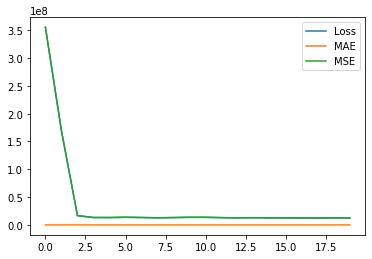

In [42]:
plt.figure()
plt.plot(hist['epoch'], hist['loss'], label = 'Loss')
plt.plot(hist['epoch'], hist['mae'], label = 'MAE')
plt.plot(hist['epoch'], hist['mse'], label = 'MSE')
plt.legend()

In [50]:
tf_model_2 = build_tf_model()

early_stop = keras.callbacks.EarlyStopping(monitor = 'mae', patience = 10)

early_history = tf_model_2.fit(X_train, y_train, epochs = 1000, verbose = 1)

Train on 2166 samples
Epoch 1/1000
2166/2166 [==============================] - 1s 234us/sample - loss: 349629028.4432 - mae: 4749.8169 - mse: 349629024.0000
Epoch 2/1000
2166/2166 [==============================] - 0s 173us/sample - loss: 174854131.7525 - mae: 3334.1487 - mse: 174854096.0000
Epoch 3/1000
2166/2166 [==============================] - 0s 147us/sample - loss: 16992026.1697 - mae: 1528.0370 - mse: 16992028.0000
Epoch 4/1000
2166/2166 [==============================] - 0s 136us/sample - loss: 14150260.1131 - mae: 1156.3704 - mse: 14150264.0000
Epoch 5/1000
2166/2166 [==============================] - 0s 133us/sample - loss: 13347820.9559 - mae: 1134.1661 - mse: 13347820.0000
Epoch 6/1000
2166/2166 [==============================] - 0s 120us/sample - loss: 13507361.9097 - mae: 1146.0067 - mse: 13507362.0000
Epoch 7/1000
2166/2166 [==============================] - 0s 131us/sample - loss: 13458576.9197 - mae: 1153.5847 - mse: 13458579.0000
Epoch 8/1000
2166/2166 [============

2166/2166 [==============================] - 0s 142us/sample - loss: 11956816.4781 - mae: 1044.4020 - mse: 11956817.0000
Epoch 61/1000
2166/2166 [==============================] - 0s 134us/sample - loss: 12254375.1413 - mae: 1058.6736 - mse: 12254375.0000
Epoch 62/1000
2166/2166 [==============================] - 0s 127us/sample - loss: 12235905.0821 - mae: 1087.0387 - mse: 12235906.0000
Epoch 63/1000
2166/2166 [==============================] - 0s 148us/sample - loss: 11951826.8674 - mae: 1055.3926 - mse: 11951826.0000
Epoch 64/1000
2166/2166 [==============================] - 0s 134us/sample - loss: 11746384.7948 - mae: 1059.6332 - mse: 11746383.0000
Epoch 65/1000
2166/2166 [==============================] - 0s 128us/sample - loss: 11565749.4510 - mae: 1036.5702 - mse: 11565748.0000
Epoch 66/1000
2166/2166 [==============================] - 0s 137us/sample - loss: 12456005.7431 - mae: 1062.5175 - mse: 12456006.0000
Epoch 67/1000
2166/2166 [==============================] - 0s 167us/s

Epoch 121/1000
2166/2166 [==============================] - 0s 117us/sample - loss: 10032625.5695 - mae: 956.1528 - mse: 10032623.0000
Epoch 122/1000
2166/2166 [==============================] - 0s 216us/sample - loss: 11478480.7521 - mae: 965.0804 - mse: 11478477.0000
Epoch 123/1000
2166/2166 [==============================] - 0s 166us/sample - loss: 10193508.8255 - mae: 1039.5011 - mse: 10193508.0000
Epoch 124/1000
2166/2166 [==============================] - 0s 127us/sample - loss: 10293236.1214 - mae: 928.2277 - mse: 10293238.0000
Epoch 125/1000
2166/2166 [==============================] - 0s 184us/sample - loss: 9014357.0575 - mae: 897.1852 - mse: 9014355.0000
Epoch 126/1000
2166/2166 [==============================] - 0s 147us/sample - loss: 9394696.8561 - mae: 914.6462 - mse: 9394698.0000
Epoch 127/1000
2166/2166 [==============================] - 0s 173us/sample - loss: 10632068.2510 - mae: 971.0424 - mse: 10632066.0000
Epoch 128/1000
2166/2166 [==============================] 

2166/2166 [==============================] - 0s 138us/sample - loss: 4712249.3636 - mae: 746.1649 - mse: 4712248.0000
Epoch 183/1000
2166/2166 [==============================] - 0s 155us/sample - loss: 4642085.8131 - mae: 734.9310 - mse: 4642085.0000
Epoch 184/1000
2166/2166 [==============================] - 0s 150us/sample - loss: 4771789.2423 - mae: 719.2994 - mse: 4771789.0000
Epoch 185/1000
2166/2166 [==============================] - 0s 142us/sample - loss: 4407917.3352 - mae: 713.4420 - mse: 4407917.0000
Epoch 186/1000
2166/2166 [==============================] - 0s 136us/sample - loss: 6000412.7992 - mae: 814.2328 - mse: 6000412.0000s - loss: 4133072.3387 - mae: 699.4006 - mse: 4133072.0
Epoch 187/1000
2166/2166 [==============================] - 0s 185us/sample - loss: 4488001.8115 - mae: 737.1224 - mse: 4488001.5000
Epoch 188/1000
2166/2166 [==============================] - 0s 132us/sample - loss: 4012124.6434 - mae: 667.3446 - mse: 4012125.5000
Epoch 189/1000
2166/2166 [===

2166/2166 [==============================] - 0s 117us/sample - loss: 2306420.0415 - mae: 610.6704 - mse: 2306420.0000
Epoch 244/1000
2166/2166 [==============================] - 0s 224us/sample - loss: 2270593.3715 - mae: 598.3007 - mse: 2270593.7500
Epoch 245/1000
2166/2166 [==============================] - 0s 221us/sample - loss: 2780214.2642 - mae: 641.0185 - mse: 2780214.5000
Epoch 246/1000
2166/2166 [==============================] - 0s 229us/sample - loss: 8336331.2690 - mae: 1032.7618 - mse: 8336331.0000
Epoch 247/1000
2166/2166 [==============================] - 1s 248us/sample - loss: 22169745.3070 - mae: 1563.9371 - mse: 22169746.0000
Epoch 248/1000
2166/2166 [==============================] - 0s 138us/sample - loss: 5910273.7999 - mae: 868.7247 - mse: 5910273.0000
Epoch 249/1000
2166/2166 [==============================] - 0s 160us/sample - loss: 2764099.2877 - mae: 605.9232 - mse: 2764099.0000
Epoch 250/1000
2166/2166 [==============================] - 0s 164us/sample - lo

2166/2166 [==============================] - 0s 152us/sample - loss: 1471790.0395 - mae: 529.3978 - mse: 1471790.0000
Epoch 305/1000
2166/2166 [==============================] - 0s 143us/sample - loss: 3165453.8257 - mae: 650.8367 - mse: 3165454.0000
Epoch 306/1000
2166/2166 [==============================] - 0s 135us/sample - loss: 2560250.3501 - mae: 684.4928 - mse: 2560250.2500
Epoch 307/1000
2166/2166 [==============================] - 0s 184us/sample - loss: 1596243.6824 - mae: 541.1315 - mse: 1596243.6250
Epoch 308/1000
2166/2166 [==============================] - 0s 168us/sample - loss: 1428810.6885 - mae: 508.8282 - mse: 1428810.7500
Epoch 309/1000
2166/2166 [==============================] - 0s 136us/sample - loss: 1368306.6286 - mae: 495.2371 - mse: 1368306.5000
Epoch 310/1000
2166/2166 [==============================] - 0s 140us/sample - loss: 1343626.3177 - mae: 488.8710 - mse: 1343626.3750
Epoch 311/1000
2166/2166 [==============================] - 0s 143us/sample - loss: 

2166/2166 [==============================] - 0s 166us/sample - loss: 2524281.9567 - mae: 587.2814 - mse: 2524281.2500
Epoch 366/1000
2166/2166 [==============================] - 0s 180us/sample - loss: 15965786.0047 - mae: 1123.0552 - mse: 15965784.0000
Epoch 367/1000
2166/2166 [==============================] - 1s 324us/sample - loss: 2817400.2768 - mae: 659.5657 - mse: 2817400.0000
Epoch 368/1000
2166/2166 [==============================] - 0s 155us/sample - loss: 1297057.3884 - mae: 502.5887 - mse: 1297057.5000
Epoch 369/1000
2166/2166 [==============================] - 0s 170us/sample - loss: 1129797.1749 - mae: 474.7234 - mse: 1129797.2500
Epoch 370/1000
2166/2166 [==============================] - 0s 163us/sample - loss: 835438.6731 - mae: 435.0042 - mse: 835438.7500
Epoch 371/1000
2166/2166 [==============================] - 0s 227us/sample - loss: 865377.3382 - mae: 423.4800 - mse: 865377.4375
Epoch 372/1000
2166/2166 [==============================] - 0s 148us/sample - loss: 8

2166/2166 [==============================] - 0s 180us/sample - loss: 685846.7157 - mae: 413.0809 - mse: 685846.6875
Epoch 428/1000
2166/2166 [==============================] - 0s 151us/sample - loss: 596884.3344 - mae: 386.8147 - mse: 596884.3125
Epoch 429/1000
2166/2166 [==============================] - 0s 126us/sample - loss: 695523.0527 - mae: 421.1129 - mse: 695522.9375
Epoch 430/1000
2166/2166 [==============================] - 0s 124us/sample - loss: 663619.0065 - mae: 401.4363 - mse: 663618.8750
Epoch 431/1000
2166/2166 [==============================] - 0s 157us/sample - loss: 780158.6283 - mae: 420.3998 - mse: 780158.6250
Epoch 432/1000
2166/2166 [==============================] - 0s 215us/sample - loss: 1348285.7975 - mae: 530.9169 - mse: 1348285.6250
Epoch 433/1000
2166/2166 [==============================] - 0s 164us/sample - loss: 548347.0995 - mae: 397.0935 - mse: 548347.1250
Epoch 434/1000
2166/2166 [==============================] - 0s 169us/sample - loss: 707356.3092 

2166/2166 [==============================] - 0s 177us/sample - loss: 6340359.1759 - mae: 956.7123 - mse: 6340360.0000
Epoch 490/1000
2166/2166 [==============================] - 1s 280us/sample - loss: 4545296.8506 - mae: 652.5275 - mse: 4545297.0000s - loss: 4634105.7146 - mae: 646.7366 - mse: 4634106.000 - ETA: 0s - loss: 4611429.1418 - mae: 649.1305 - mse: 4611429.50
Epoch 491/1000
2166/2166 [==============================] - 0s 209us/sample - loss: 12872699.3085 - mae: 964.5325 - mse: 12872700.0000
Epoch 492/1000
2166/2166 [==============================] - 0s 174us/sample - loss: 1369234.4823 - mae: 558.5420 - mse: 1369234.3750
Epoch 493/1000
2166/2166 [==============================] - 0s 154us/sample - loss: 724136.9735 - mae: 412.1827 - mse: 724136.8750
Epoch 494/1000
2166/2166 [==============================] - 0s 163us/sample - loss: 545670.7988 - mae: 372.3076 - mse: 545670.8750
Epoch 495/1000
2166/2166 [==============================] - 0s 158us/sample - loss: 507151.7769 -

2166/2166 [==============================] - 0s 168us/sample - loss: 394722.4204 - mae: 344.6502 - mse: 394722.3750
Epoch 550/1000
2166/2166 [==============================] - 0s 142us/sample - loss: 537918.8743 - mae: 383.6789 - mse: 537918.9375
Epoch 551/1000
2166/2166 [==============================] - 0s 146us/sample - loss: 380573.8667 - mae: 328.9199 - mse: 380573.8438
Epoch 552/1000
2166/2166 [==============================] - 0s 168us/sample - loss: 616266.3933 - mae: 352.4802 - mse: 616266.3750
Epoch 553/1000
2166/2166 [==============================] - 0s 161us/sample - loss: 823463.4759 - mae: 392.5990 - mse: 823463.4375
Epoch 554/1000
2166/2166 [==============================] - 0s 145us/sample - loss: 826718.5913 - mae: 431.7001 - mse: 826718.7500
Epoch 555/1000
2166/2166 [==============================] - 0s 155us/sample - loss: 980385.4400 - mae: 460.2592 - mse: 980385.5000
Epoch 556/1000
2166/2166 [==============================] - 0s 156us/sample - loss: 1196671.7613 -

2166/2166 [==============================] - 0s 175us/sample - loss: 1222285.6819 - mae: 446.6592 - mse: 1222285.7500
Epoch 612/1000
2166/2166 [==============================] - 0s 223us/sample - loss: 3168893.8726 - mae: 626.3195 - mse: 3168893.7500
Epoch 613/1000
2166/2166 [==============================] - 0s 165us/sample - loss: 11754419.0826 - mae: 928.4911 - mse: 11754418.0000
Epoch 614/1000
2166/2166 [==============================] - 0s 187us/sample - loss: 11172823.5415 - mae: 1095.9834 - mse: 11172822.0000
Epoch 615/1000
2166/2166 [==============================] - 0s 161us/sample - loss: 1886817.3571 - mae: 512.3999 - mse: 1886817.2500
Epoch 616/1000
2166/2166 [==============================] - 0s 157us/sample - loss: 2154176.3648 - mae: 482.0435 - mse: 2154176.2500
Epoch 617/1000
2166/2166 [==============================] - 0s 149us/sample - loss: 5592847.6029 - mae: 647.0046 - mse: 5592848.0000
Epoch 618/1000
2166/2166 [==============================] - 0s 135us/sample - l

2166/2166 [==============================] - 0s 200us/sample - loss: 698981.7041 - mae: 370.8763 - mse: 698981.6875
Epoch 674/1000
2166/2166 [==============================] - 0s 162us/sample - loss: 468998.2001 - mae: 333.1496 - mse: 468998.2500
Epoch 675/1000
2166/2166 [==============================] - 0s 166us/sample - loss: 335080.1174 - mae: 290.1726 - mse: 335080.1562
Epoch 676/1000
2166/2166 [==============================] - 0s 160us/sample - loss: 262092.7549 - mae: 275.2344 - mse: 262092.7656
Epoch 677/1000
2166/2166 [==============================] - 0s 153us/sample - loss: 222048.3338 - mae: 266.1480 - mse: 222048.3438
Epoch 678/1000
2166/2166 [==============================] - 0s 209us/sample - loss: 221277.1092 - mae: 264.4363 - mse: 221277.0938
Epoch 679/1000
2166/2166 [==============================] - 0s 214us/sample - loss: 438278.4208 - mae: 326.8585 - mse: 438278.3438
Epoch 680/1000
2166/2166 [==============================] - 0s 138us/sample - loss: 401645.2168 - 

Epoch 735/1000
2166/2166 [==============================] - 1s 250us/sample - loss: 1476262.3725 - mae: 502.5582 - mse: 1476262.0000
Epoch 736/1000
2166/2166 [==============================] - 0s 171us/sample - loss: 657820.3195 - mae: 347.8951 - mse: 657820.3750
Epoch 737/1000
2166/2166 [==============================] - 0s 216us/sample - loss: 322333.0886 - mae: 285.1242 - mse: 322333.0625
Epoch 738/1000
2166/2166 [==============================] - 0s 173us/sample - loss: 304175.1857 - mae: 277.6635 - mse: 304175.1562
Epoch 739/1000
2166/2166 [==============================] - 1s 233us/sample - loss: 261819.2264 - mae: 270.8090 - mse: 261819.2188
Epoch 740/1000
2166/2166 [==============================] - 0s 185us/sample - loss: 229263.8967 - mae: 265.1531 - mse: 229263.8750
Epoch 741/1000
2166/2166 [==============================] - 1s 238us/sample - loss: 522361.5964 - mae: 328.4536 - mse: 522361.5625
Epoch 742/1000
2166/2166 [==============================] - 0s 128us/sample - los

Epoch 797/1000
2166/2166 [==============================] - 0s 148us/sample - loss: 320606.4262 - mae: 274.3133 - mse: 320606.4062
Epoch 798/1000
2166/2166 [==============================] - 0s 174us/sample - loss: 428846.5974 - mae: 290.3695 - mse: 428846.5938
Epoch 799/1000
2166/2166 [==============================] - 0s 119us/sample - loss: 333960.9053 - mae: 279.1207 - mse: 333960.9062
Epoch 800/1000
2166/2166 [==============================] - 0s 148us/sample - loss: 758485.6189 - mae: 354.6841 - mse: 758485.6250
Epoch 801/1000
2166/2166 [==============================] - 0s 186us/sample - loss: 512561.3270 - mae: 334.6544 - mse: 512561.2812
Epoch 802/1000
2166/2166 [==============================] - 0s 165us/sample - loss: 317854.3370 - mae: 282.5738 - mse: 317854.3438
Epoch 803/1000
2166/2166 [==============================] - 0s 207us/sample - loss: 251867.1585 - mae: 258.4082 - mse: 251867.1562
Epoch 804/1000
2166/2166 [==============================] - 0s 154us/sample - loss:

2166/2166 [==============================] - 0s 126us/sample - loss: 267541.2742 - mae: 263.7908 - mse: 267541.2188
Epoch 860/1000
2166/2166 [==============================] - 0s 128us/sample - loss: 198873.9460 - mae: 245.5403 - mse: 198873.9688
Epoch 861/1000
2166/2166 [==============================] - 0s 158us/sample - loss: 182833.9343 - mae: 236.3908 - mse: 182833.9375
Epoch 862/1000
2166/2166 [==============================] - 0s 178us/sample - loss: 190179.9168 - mae: 237.8803 - mse: 190179.9219
Epoch 863/1000
2166/2166 [==============================] - 0s 159us/sample - loss: 1024260.8672 - mae: 425.0661 - mse: 1024260.8750
Epoch 864/1000
2166/2166 [==============================] - 0s 148us/sample - loss: 1420827.7253 - mae: 483.8048 - mse: 1420827.3750
Epoch 865/1000
2166/2166 [==============================] - 0s 176us/sample - loss: 240629.9501 - mae: 254.9228 - mse: 240629.9219
Epoch 866/1000
2166/2166 [==============================] - 0s 189us/sample - loss: 263839.192

2166/2166 [==============================] - 0s 152us/sample - loss: 210228.7009 - mae: 232.1607 - mse: 210228.6562
Epoch 922/1000
2166/2166 [==============================] - 0s 126us/sample - loss: 217307.2140 - mae: 225.3117 - mse: 217307.2500
Epoch 923/1000
2166/2166 [==============================] - 0s 143us/sample - loss: 406951.7531 - mae: 274.7500 - mse: 406951.7812
Epoch 924/1000
2166/2166 [==============================] - 0s 162us/sample - loss: 616718.7231 - mae: 352.7489 - mse: 616718.6875
Epoch 925/1000
2166/2166 [==============================] - 0s 187us/sample - loss: 282227.8748 - mae: 265.8059 - mse: 282227.9062
Epoch 926/1000
2166/2166 [==============================] - 0s 140us/sample - loss: 361956.6287 - mae: 295.4742 - mse: 361956.5938
Epoch 927/1000
2166/2166 [==============================] - 0s 119us/sample - loss: 215740.5721 - mae: 239.8384 - mse: 215740.5469
Epoch 928/1000
2166/2166 [==============================] - 0s 144us/sample - loss: 642631.9647 - 

2166/2166 [==============================] - 0s 141us/sample - loss: 149606.0976 - mae: 218.9364 - mse: 149606.0781
Epoch 984/1000
2166/2166 [==============================] - 0s 123us/sample - loss: 202943.4904 - mae: 225.2469 - mse: 202943.5156
Epoch 985/1000
2166/2166 [==============================] - 0s 130us/sample - loss: 778318.6734 - mae: 390.0460 - mse: 778318.6250
Epoch 986/1000
2166/2166 [==============================] - 0s 152us/sample - loss: 447049.8375 - mae: 307.2834 - mse: 447049.8438
Epoch 987/1000
2166/2166 [==============================] - 0s 156us/sample - loss: 191826.0865 - mae: 245.8711 - mse: 191826.0625
Epoch 988/1000
2166/2166 [==============================] - 0s 133us/sample - loss: 182833.9820 - mae: 234.7441 - mse: 182834.0312
Epoch 989/1000
2166/2166 [==============================] - 0s 117us/sample - loss: 174534.8802 - mae: 208.6053 - mse: 174534.8906
Epoch 990/1000
2166/2166 [==============================] - 0s 200us/sample - loss: 161453.7000 - 